In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images

In [2]:
df = pd.read_csv("data/2023_combos.csv")
df

,p1,p2,combos,p1g,p1a,p2g,p2a,p1g_p2a,p2g_p1a,goals
0,Sophia Smith,Morgan Weaver,3,11,5,7,4,2,1,18
1,Lynn Williams,Midge Purce,3,7,2,4,2,2,1,11
2,Jaedyn Shaw,Makenzy Doniak,3,6,3,3,2,1,2,9
3,Megan Rapinoe,Veronica Latsko,3,4,5,4,2,0,3,8
4,Savannah McCaskill,Katie Johnson,3,4,3,3,1,1,2,7
...,...,...,...,...,...,...,...,...,...,...
186,Ally Prisock,Caprice Dydasco,1,1,0,0,1,1,0,1
187,Andressa,Nichelle Prince,1,1,0,0,2,1,0,1
188,Jordan Elisabeth Baggett,Lauren Milliet,1,1,0,0,1,1,0,1
189,Haley Hopkins,Kerolin Nicoli Israel Ferraz,1,1,1,0,3,1,0,1


In [3]:
# Constants
GOAL_COLOR = "#5c3c92"
ASSIST_COLOR = "#077b8a"

H = 0.3
GAP = 0.1
FONT_SIZE = 24

COMBO_GOALS_STYLE = {"ec": GOAL_COLOR, "fc": GOAL_COLOR, "alpha": 1}
COMBO_ASSISTS_STYLE = {"ec": ASSIST_COLOR, "fc": ASSIST_COLOR, "alpha": 1}
GOALS_STYLE = {"ec": GOAL_COLOR, "fc": GOAL_COLOR, "alpha" : 0.65}
ASSISTS_STYLE = {"ec": ASSIST_COLOR, "fc": ASSIST_COLOR, "alpha" : 0.65}

<Figure size 1008x1008 with 0 Axes>

<Figure size 16800x16800 with 0 Axes>

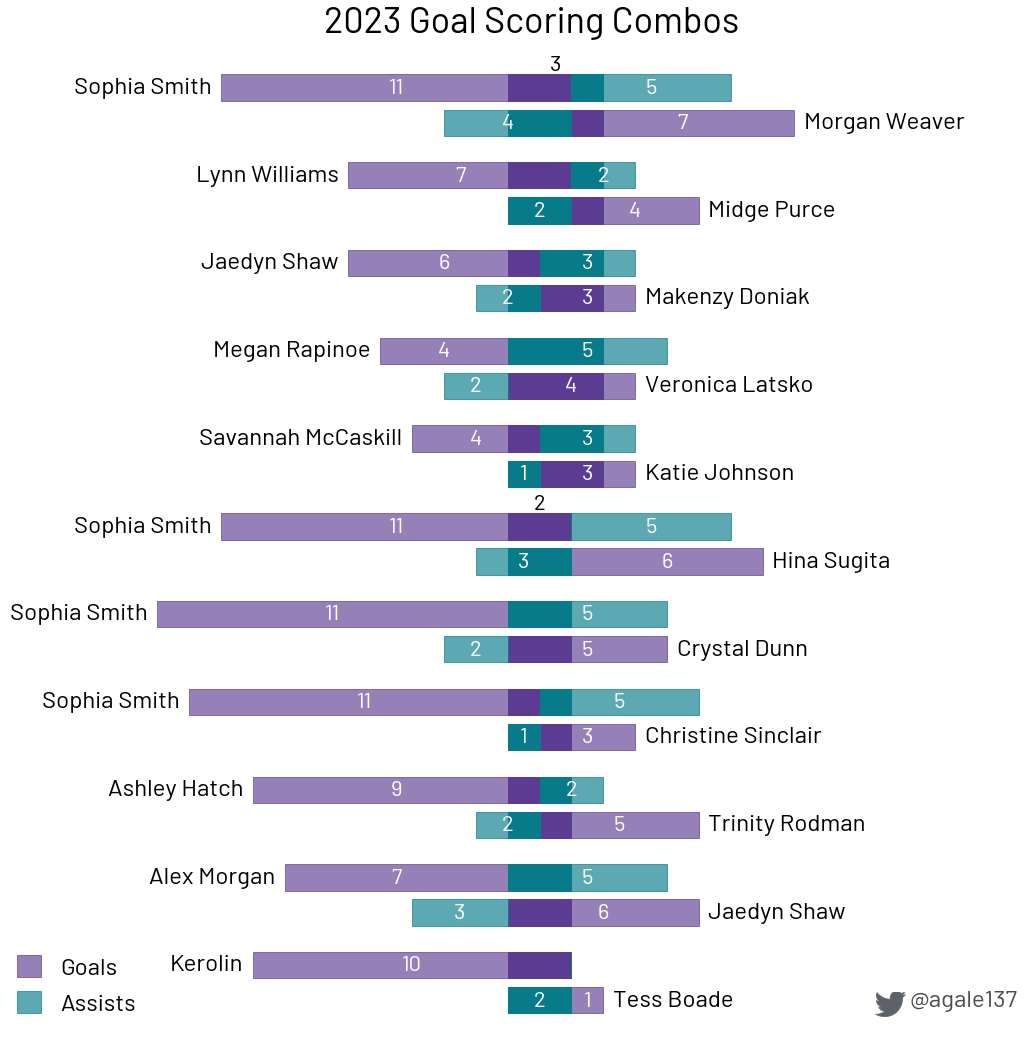

In [7]:
# Draw the plot
plt.clf()
plt.rcParams["figure.figsize"] = (14, 14)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.tight_layout()
fig.patch.set_facecolor("white")
fig.gca().invert_yaxis()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.set_xticks([])
ax.set_yticks([])
plt.xlim([-14, 16])
plt.ylim([11, 0])

# Title
fig.suptitle(
    "2023 Goal Scoring Combos",
    color="black",
    fontsize=36,
    fontproperties=Fonts.BARLOW,
    y=1.02,
    va="bottom",
)

for i, row in df[0:11].iterrows():
    # p1 goals
    ax.add_patch(
        Rectangle((row["p1g_p2a"] - row["p1g"], i), row["p1g"], H, **GOALS_STYLE)
    )
    plt.text(
        row["p1g_p2a"] - row["p1g"] / 2,
        i + H / 2,
        row["p1g"],
        color="white",
        fontsize=FONT_SIZE - 2,
        fontproperties=Fonts.BARLOW,
        va="center",
        ha="center",
    )
    # p1 assists
    ax.add_patch(Rectangle((row["p1g_p2a"], i), row["p1a"], H, **ASSISTS_STYLE))
    if row["p1a"] > 0:
        plt.text(
            row["p1g_p2a"] + row["p1a"] / 2,
            i + H / 2,
            row["p1a"],
            color="white",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="center",
            ha="center",
        )
    # p1 combos
    ax.add_patch(Rectangle((0, i), row["p1g_p2a"], H, **COMBO_GOALS_STYLE))
    ax.add_patch(
        Rectangle((row["p1g_p2a"], i), row["p2g_p1a"], H, **COMBO_ASSISTS_STYLE)
    )
    if i in [0, 5]:
        plt.text(
            (row["p1g_p2a"] + row["p2g_p1a"]) / 2,
            i,
            row["p1g_p2a"] + row["p2g_p1a"],
            color="black",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="bottom",
            ha="center",
        )
    # p1 name
    plt.text(
        row["p1g_p2a"] - row["p1g"] - H,
        i + H / 2,
        row["p1"],
        color="black",
        fontsize=FONT_SIZE,
        fontproperties=Fonts.BARLOW,
        ha="right",
        va="center",
    )

    # p2 goals
    ax.add_patch(Rectangle((row["p1g_p2a"], i + H + GAP), row["p2g"], H, **GOALS_STYLE))
    plt.text(
        row["p1g_p2a"] + row["p2g"] / 2,
        i + H * 3 / 2 + GAP,
        row["p2g"],
        color="white",
        fontsize=FONT_SIZE - 2,
        fontproperties=Fonts.BARLOW,
        va="center",
        ha="center",
    )
    # p2 assists
    ax.add_patch(
        Rectangle(
            (row["p1g_p2a"] - row["p2a"], i + H + GAP), row["p2a"], H, **ASSISTS_STYLE
        )
    )
    if row["p2a"] > 0:
        plt.text(
            row["p1g_p2a"] - row["p2a"] / 2,
            i + H * 3 / 2 + GAP,
            row["p2a"],
            color="white",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="center",
            ha="center",
        )
    # p2 combos
    ax.add_patch(
        Rectangle((row["p1g_p2a"], i + H + GAP), row["p2g_p1a"], H, **COMBO_GOALS_STYLE)
    )
    ax.add_patch(Rectangle((0, i + H + GAP), row["p1g_p2a"], H, **COMBO_ASSISTS_STYLE))
    # p2 name
    plt.text(
        row["p1g_p2a"] + row["p2g"] + H,
        i + H * 3 / 2 + GAP,
        row["p2"],
        color="black",
        fontsize=FONT_SIZE,
        fontproperties=Fonts.BARLOW,
        ha="left",
        va="center",
    )

# Legend
fp = Fonts.BARLOW
fp.set_size(24)
ax.legend(
    ["Goals", "Assists"],
    bbox_to_anchor=(0.1, 0.11),
    prop=fp,
    handlelength=1,
    handleheight=1,
    frameon=False,
)

# Twitter logo and username
plt.text(
    1,
    0.04,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.84, 0.05, 0.03, 0.03], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig("images/2023_combos.png", bbox_inches="tight", pad_inches=0.5)